In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import clear_output

InteractiveShell.ast_node_interactivity = "all"

## EDA

In [2]:
df = pd.read_csv('ffmemes_tgchannelru_stats.csv')
df2 = pd.read_csv('meme_features_ru.csv')

In [3]:
df2.shape
df2.dropna(axis=0).shape

df.shape
df.dropna(axis=0).shape

# all values are non-null

(64357, 12)

(64357, 12)

(15074, 7)

(15074, 7)

Format channel of memes

Analysis of channel of memes

In [4]:
tviews = df.groupby("meme_id").views.sum()
tshares = df.groupby("meme_id").shares.sum()

y_memes = df.loc[
    df.groupby("meme_id")["time"].idxmin()
]  # remove duplicates with replacement for earliest time

y_memes = y_memes.drop(columns=["views", "shares", "chat_id", 'message_id'])
y_memes = pd.merge(y_memes, tviews, on="meme_id")
y_memes = pd.merge(y_memes, tshares, on="meme_id")
y_memes
y_memes.to_csv("formatted_ff_tgchannelru_stats.csv", index=False)
# Convert 'time' to datetime if necessary

y_memes["time"] = pd.to_datetime(y_memes["time"], unit="ms")
y_memes

,time,text,meme_id,views,shares
0,1709424000000,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,874731,1232,9
1,1709424000000,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,962706,1228,19
2,1709510400000,🩵 [__Fast Food Memes](https://t.me/ffmemesbot?...,974985,1200,11
3,1709424000000,🪪 [__Fast Food Memes](https://t.me/ffmemesbot?...,978735,1297,21
4,1709424000000,🪺 [__Fast Food Memes](https://t.me/ffmemesbot?...,998981,1301,30
...,...,...,...,...,...
394,1715299200000,🧆 [__Fast Food Memes](https://t.me/ffmemesbot?...,7809865,883,11
395,1715299200000,🧖🏻‍♂️ [__Fast Food Memes](https://t.me/ffmemes...,7825151,871,17
396,1715212800000,🪂 [__Fast Food Memes](https://t.me/ffmemesbot?...,7829335,929,16
397,1715212800000,🤺 [__Fast Food Memes](https://t.me/ffmemesbot?...,7972479,903,29


,time,text,meme_id,views,shares
0,2024-03-03,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,874731,1232,9
1,2024-03-03,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,962706,1228,19
2,2024-03-04,🩵 [__Fast Food Memes](https://t.me/ffmemesbot?...,974985,1200,11
3,2024-03-03,🪪 [__Fast Food Memes](https://t.me/ffmemesbot?...,978735,1297,21
4,2024-03-03,🪺 [__Fast Food Memes](https://t.me/ffmemesbot?...,998981,1301,30
...,...,...,...,...,...
394,2024-05-10,🧆 [__Fast Food Memes](https://t.me/ffmemesbot?...,7809865,883,11
395,2024-05-10,🧖🏻‍♂️ [__Fast Food Memes](https://t.me/ffmemes...,7825151,871,17
396,2024-05-09,🪂 [__Fast Food Memes](https://t.me/ffmemesbot?...,7829335,929,16
397,2024-05-09,🤺 [__Fast Food Memes](https://t.me/ffmemesbot?...,7972479,903,29


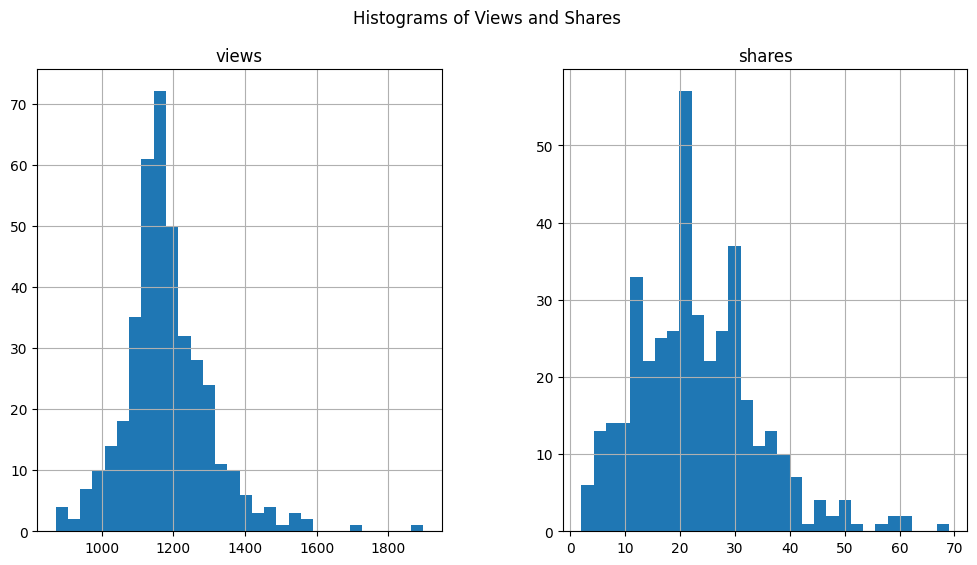

Correlation between views and shares: 0.5034382121931904


In [5]:
correlation = y_memes['views'].corr(y_memes['shares'])

y_memes[['views', 'shares']].hist(bins=30, figsize=(12, 6))
plt.suptitle('Histograms of Views and Shares')

clear_output()
plt.show()
print(f'Correlation between views and shares: {correlation}')


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Views Over Time')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Views')

(array([19783., 19797., 19814., 19828., 19844.]),
 [Text(19783.0, 0, '2024-03-01'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01')])

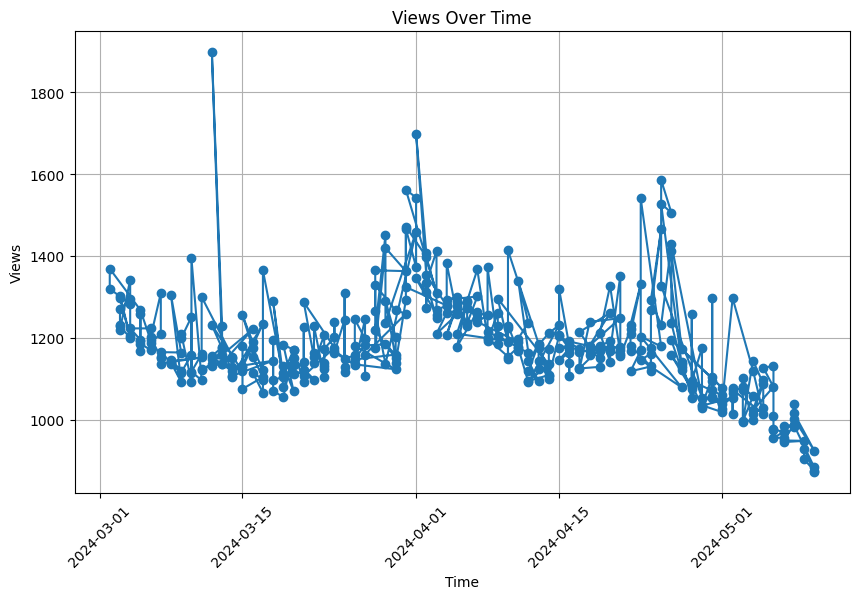

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_memes['time'], y_memes['views'], marker='o', linestyle='-')
plt.title('Views Over Time')
plt.xlabel('Time')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
y_memes.sort_values(by='time', inplace=True)

In [8]:
window_size = 30 
rolling_mean = y_memes['views'].rolling(window=window_size).mean()
rolling_std = y_memes['views'].rolling(window=window_size).std()

# Define a threshold for considering a drop significant
# Here, we use the mean minus two standard deviations as a simple heuristic
threshold = rolling_mean - rolling_std

# Filter for significant drops memes
significant_drops = y_memes[(y_memes['views'] <= threshold)]
drop_density = significant_drops.groupby('time').time.count().sort_values(ascending=False)
drop_density

time
2024-04-12    5
2024-05-07    5
2024-03-08    5
2024-04-08    4
2024-04-29    4
2024-05-10    4
2024-05-09    3
2024-03-09    3
2024-05-06    3
2024-04-09    3
2024-04-10    3
2024-04-11    3
2024-04-14    3
2024-03-10    3
2024-03-19    2
2024-04-05    2
2024-05-03    2
2024-04-27    2
2024-04-28    2
2024-05-01    1
2024-05-04    1
2024-05-02    1
2024-04-22    1
2024-03-20    1
2024-04-13    1
2024-03-11    1
2024-03-18    1
2024-03-30    1
2024-03-27    1
2024-03-07    1
Name: time, dtype: int64

<Figure size 1000x600 with 0 Axes>

(array([ 9.,  4.,  0.,  0.,  0.,  3.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         2.,  0., 10.,  8.,  4.,  0.,  0.,  0.,  1.,  0.,  2.,  6.,  1.,
         3.,  1.,  8.,  7.]),
 array([19789.        , 19791.13333333, 19793.26666667, 19795.4       ,
        19797.53333333, 19799.66666667, 19801.8       , 19803.93333333,
        19806.06666667, 19808.2       , 19810.33333333, 19812.46666667,
        19814.6       , 19816.73333333, 19818.86666667, 19821.        ,
        19823.13333333, 19825.26666667, 19827.4       , 19829.53333333,
        19831.66666667, 19833.8       , 19835.93333333, 19838.06666667,
        19840.2       , 19842.33333333, 19844.46666667, 19846.6       ,
        19848.73333333, 19850.86666667, 19853.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of Significant Drops')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Frequency of Drops')

(array([19790., 19797., 19804., 19814., 19821., 19828., 19835., 19844.,
        19851.]),
 [Text(19790.0, 0, '2024-03-08'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19804.0, 0, '2024-03-22'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19821.0, 0, '2024-04-08'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19835.0, 0, '2024-04-22'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19851.0, 0, '2024-05-08')])

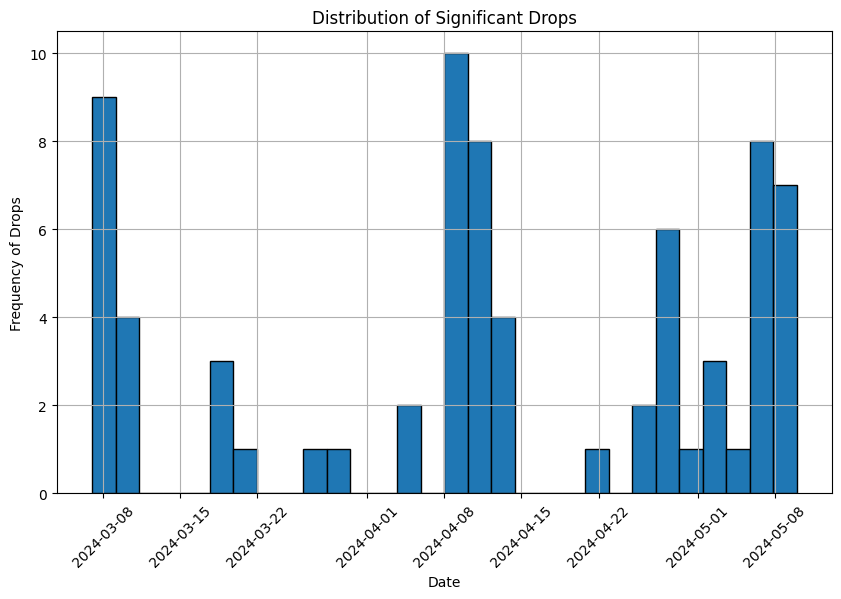

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Views Over Time')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Views')

(array([19783., 19797., 19814., 19828., 19844.]),
 [Text(19783.0, 0, '2024-03-01'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01')])

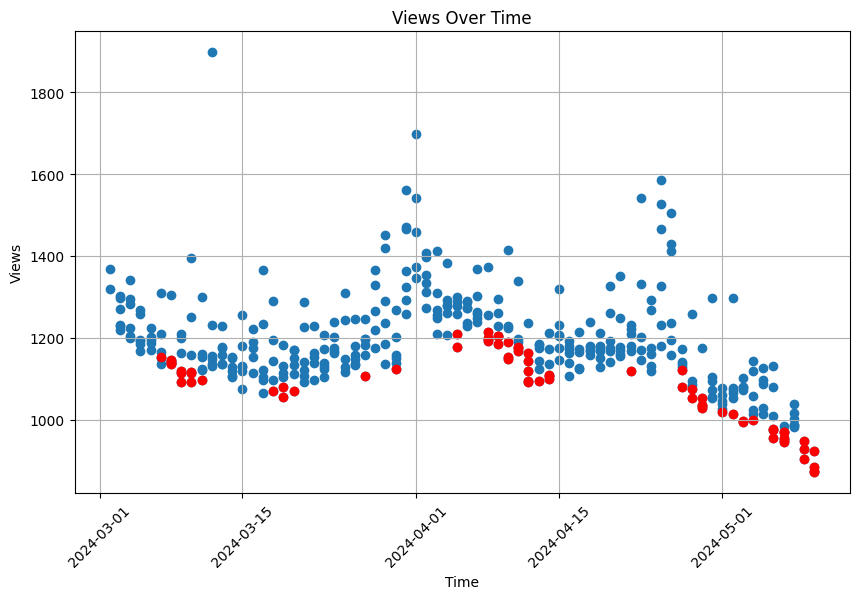

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Shares Over Time')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Shares')

(array([19783., 19797., 19814., 19828., 19844.]),
 [Text(19783.0, 0, '2024-03-01'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01')])

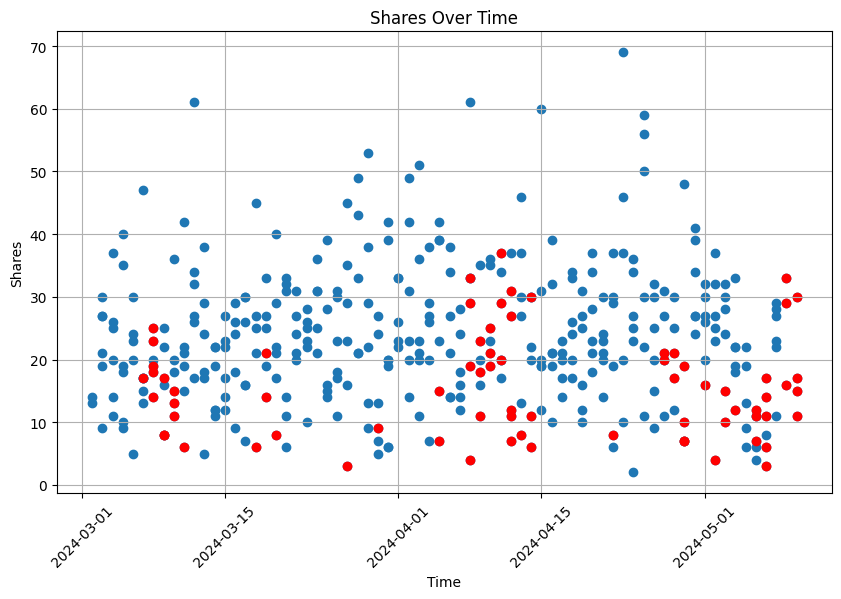

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(significant_drops['time'], bins=30, edgecolor='black')  
plt.title('Distribution of Significant Drops')
plt.xlabel('Date')
plt.ylabel('Frequency of Drops')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_memes['time'], y_memes['views'])
plt.scatter(significant_drops['time'], significant_drops['views'], color='red')
plt.title('Views Over Time')
plt.xlabel('Time')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
plt.scatter(y_memes['time'], y_memes['shares'])
plt.scatter(significant_drops['time'], significant_drops['shares'], color='red')
plt.title('Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Shares')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- From drop_density and plot, we can find the threshold of timeline when memes not enough "mature", not stuck in __views__  and __shares__ growth
- Low views and low shares not affect to each other

In [10]:
Y = y_memes[y_memes['time'] <= '2024-04-29']


## Preparing dataset X, y for **views** and **shares**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df2[df2['meme_id'].isin(Y['meme_id'])]

In [13]:
X.sort_values(by=['meme_id'], inplace=True)
Y.sort_values(by=['meme_id'], inplace=True)

/var/folders/0_/rw0q19mn7hq3c2rsyy739y9m0000gn/T/ipykernel_24308/2575709393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.sort_values(by=['meme_id'], inplace=True)
/var/folders/0_/rw0q19mn7hq3c2rsyy739y9m0000gn/T/ipykernel_24308/2575709393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.sort_values(by=['meme_id'], inplace=True)


In [14]:
Y = Y.drop(columns=['time', 'text', 'meme_id']) # not sure
X = X.drop(columns=['meme_id'])
X.reset_index(drop=True)
Y.reset_index(drop=True)

,nlikes,ndislikes,nmemes_sent,age_days,raw_impr_rank,sec_to_react,invited_count,ms_nlikes,ms_ndislikes,ms_nmemes_sent,is_image
0,16,10,26,76,1,6.107990,0,4285,6693,409,1
1,75,44,121,75,0,12.276868,0,14448,15389,468,1
2,12,5,17,75,0,3.463997,0,4651,6884,405,1
3,10,5,15,75,0,10.493516,0,6292,10321,826,0
4,17,6,23,75,0,6.289802,0,9754,13484,1014,1
...,...,...,...,...,...,...,...,...,...,...,...
334,8,8,16,16,0,4.797071,0,2708,6763,620,1
335,1,1,2,15,0,12.656807,0,2708,6763,620,0
336,18,13,31,15,0,5.556931,0,3393,6385,566,1
337,20,10,31,15,1,5.066408,0,5971,9210,801,1


,views,shares
0,1232,9
1,1228,19
2,1200,11
3,1297,21
4,1301,30
...,...,...
334,1034,7
335,1094,25
336,1175,48
337,1029,7


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
views_train = y_train['views']
shares_train = y_train['shares']
views_test = y_test['views']
shares_test = y_test['shares']

## Models for predicting __views__

### Linear model

In [16]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg1 = reg.fit(X_train_scaled, views_train)
reg2 = reg.fit(X_train, views_train)

In [18]:
reg2.coef_
reg2.intercept_

array([ 4.58150126e+00,  4.28682575e+00, -4.16016748e+00, -3.81776922e-01,
        7.09322050e+00,  7.05544736e-01, -9.70288623e+01, -2.04220696e-03,
        3.59838854e-03, -9.03447493e-03, -6.97789794e+01])

1255.4213004781166

In [19]:
views_pred = reg2.predict(X_test)
print('Reg without scalling\n', r2_score(views_test, views_pred))
views_train_pred = reg2.predict(X_train)
print(r2_score(views_train, views_train_pred))

X_test_scaled = scaler.transform(X_test)
views_pred = reg1.predict(X_test)
print('Reg with scalling\n', r2_score(views_test, views_pred))
views_train_pred = reg1.predict(X_train)
print(r2_score(views_train, views_train_pred))

Reg without scalling
 -0.022583596502082415
0.04158291167624839
Reg with scalling
 -0.022583596502082415
0.04158291167624839


### Dicision Trees algorithms

from sklearn.tree import DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree_regr = DecisionTreeRegressor().fit(X_train, views_train)
views_pred_tree_test = tree_regr.predict(X_test)
views_pred_tree_train = tree_regr.predict(X_train)
print(r2_score(views_test, views_pred_tree_test))
print(r2_score(views_train, views_pred_tree_train))

-0.6914075228698064
1.0


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [27]:
params = {'max_depth': [5, 10, 15, None], 'min_samples_leaf': [1, 2, 5]}
tree_regr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_regr, params, cv=4, scoring='r2')
grid_search.fit(X_train, views_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='r2')

In [28]:
grid_search.best_params_
grid_search.best_score_

{'max_depth': 5, 'min_samples_leaf': 5}

-0.0009692137872336082

### Ensemble algorithms

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [15, None],
    "min_samples_leaf": [2, 5],
}
gb_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [15, None],
    "min_samples_leaf": [2, 5],
    "learning_rate": [0.01, 0.1, 0.5],
}

grid_search_rf = GridSearchCV(rf, rf_params, cv=4, scoring="r2")
grid_search_gb = GridSearchCV(gb, gb_params, cv=4, scoring="r2")

grid_search_rf.fit(X_train, views_train)
grid_search_gb.fit(X_train, views_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [15, None], 'min_samples_leaf': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [15, None], 'min_samples_leaf': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [30]:
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

views_pred_rf = best_rf.predict(X_test)
views_pred_gb = best_gb.predict(X_test)

print(r2_score(views_test, views_pred_rf))
print(r2_score(views_test, views_pred_gb))

0.28057633807174576
0.259158343777004


In [32]:
views_pred_ens_2 = [np.mean([views_pred_rf[i], views_pred_gb[i]]) for i in range(len(y_test))]
print(r2_score(views_test, views_pred_ens_2))

0.28197713524388424
